## Import Libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

## Set Parameters
1. `segLen`: Segment Length between 6 and 90
2. `date1`: Start date between '2015-01-01' and '2022-07-01'
3. `date2`: End date between '2022-07-00' and '2022-12-01'

In [101]:
segLen = 90
date1 = '2015-01-01'
date2 = '2022-12-01'

## Functions

In [102]:
seg, i, maxP, minP = 1, 1, 0, 0
def setPeaks(row):
    global seg, i, maxP, minP
    row['seg'] = seg
    if i == 1:
        maxCols = []
        minCols = []
        for k in range(1,segLen):
            col = 'price' + str(k)
            maxCols.append(row[col])
            minCols.append(row[col])
        maxP = max(maxCols)
        minP = min(minCols)
    if maxP > 0 and minP > 0 and (row['price'] == maxP or row['price'] == minP):
        row['y'] = row['price']
    if i == round(segLen / 2) or i == segLen:
        i, maxP, minP = 1, 0, 0
        seg += 1
    else:
        i += 1
    return row

## Prepare Dataframe
1. Load Data from file `BTC-USD.csv`
2. copying some columns of `price` depends on `segLen`
3. shifting half of them up and the others down to have price of `segLen` rows in each row to compare and operate on them including:
finding `max` and `min` `price` of each segment
and getting `mean` `x` of each segment to make the trend lines smoother.

In [104]:
df1 = pd.read_csv('BTC-USD.csv')
df1 = df1.loc[:, ('Date', 'Close')]
df1 = df1[(df1['Date'] >= date1) & (df1['Date'] <= date2)]
df1.reset_index(inplace=True)
df1['x'] = df1.index
df1 = df1.loc[:, ('x', 'Close')].rename(columns={'Close': 'price'})
for k in range(1,segLen):
    col = 'price' + str(k)
    df1[col] = df1['price'].shift(-k).fillna(value = df1.iloc[len(df1)-1].price)
df1['y'] =  0

df1 = df1.apply(setPeaks, axis = 1)
df2 = df1[['x', 'y', 'seg']]
df3 = df2.groupby('seg')['x'].mean().rename('xMean')
df2 = df2.merge(df3, on='seg', how='outer')
df2 = df2[df2['y'] != 0]
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Plot BTC-USD Price and Trend Lines

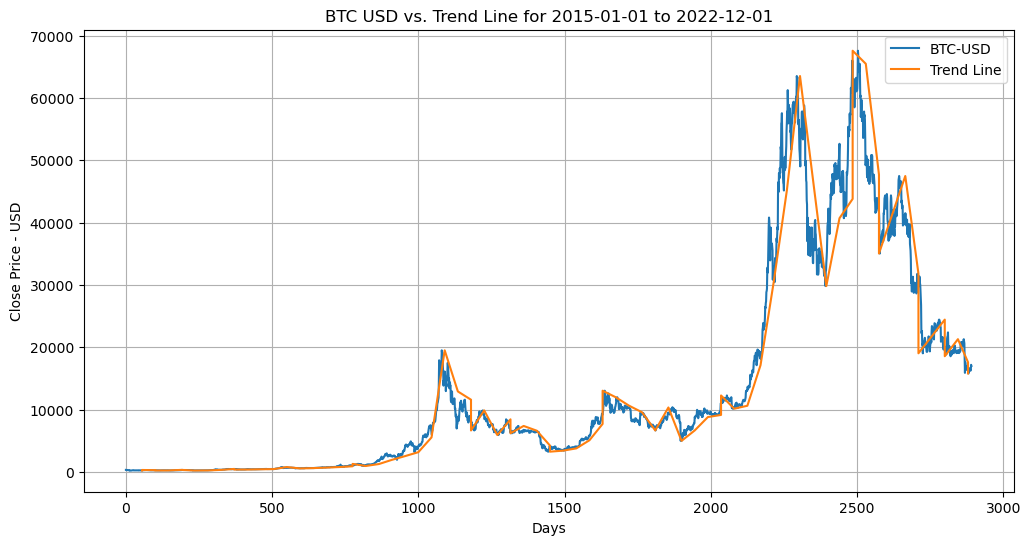

In [106]:
plt.plot(df1['x'], df1['price'], label='BTC-USD')
plt.plot(df2['xMean'], df2['y'], label='Trend Line')
plt.grid()
plt.title(f'BTC USD vs. Trend Line for {date1} to {date2}')
plt.xlabel('Days')
plt.ylabel('Close Price - USD')
plt.legend(loc='best')
plt.show()
